<a href="https://colab.research.google.com/github/RatanakamonS/DADS6003/blob/main/HW/Decision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Load libraries

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Importing the Dataset

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week10-desicion-tree/PlayTennis.csv")
df

,Day,Outlook,Temperature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


# Data Analysis

In [ ]:
df.shape  #To see the number of rows and columns in our dataset:

(14, 6)

# Preparing the Data (Data Slicing)

In [ ]:
#machine learning algorithms can only learn from numbers (int, float, doubles .. )
#so let us encode it to int
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder() #encode your data

df=df.apply(string_to_int.fit_transform) #fit and transform it
df.drop("Day", axis=1, inplace=True)
df

,Outlook,Temperature,Humidity,Wind,Play_Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [ ]:
#To divide our data into attribute set and Label:
feature_cols = df.columns
X = df.loc[:, df.columns != 'Play_Tennis']  #contains the attribute
y = df.Play_Tennis                                  #contains the label

In [ ]:
#Experiment1
#X = X.iloc[:,0]
#X = X.to_frame()
#X.head()

In [ ]:
#To divide our data into training and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=345)

In [ ]:
#if len(X_train.shape) == 1:
#  X_train = np.reshape(X_train, (-1,1))
#  X_test = np.reshape(X_test, (-1,1))

In [ ]:
X_train.shape

(9, 4)

# Training and Making Predictions

In [ ]:
# perform training
from sklearn.tree import DecisionTreeClassifier                             # import the classifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=2)
classifier.fit(X_train, y_train)                                              # fit the classifier with X and Y data or

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [ ]:
#Predict the response for test dataset
y_pred= classifier.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6


- Now let's compare some of our predicted values with the actual values and see how accurate we were:

In [ ]:
data_p = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data_p

,Actual,Predicted
13,0,1
9,1,1
0,0,0
12,1,1
8,1,0


# Evaluating the Algorithm

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 1]
 [1 2]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



# Visualizing Decision Trees

In [ ]:
#!pip install pip install pydotplus
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
X_train.head(9)
y_train.head(9)
#string_to_int.inverse_transform(X_train.iloc[:,0])

,Play_Tennis
4,1
1,0
3,1
11,1
6,1
2,1
5,0
7,0
10,1


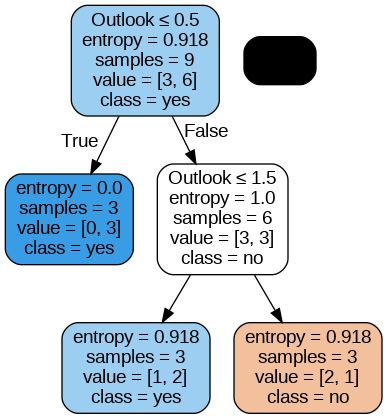

In [ ]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names =X.columns ,class_names=['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('playtennis.png')
Image(graph.create_png())

***

## Assignment
1. Apply random forest, xgboost, catboot algorithm to the play tennis dataset.

In [ ]:
!pip install catboost
!pip install xgboost

-  **Import libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder

- **ชุดข้อมูลเกี่ยวกับการตัดสินใจเล่นเทนนิสภายใต้สภาพอากาศต่างๆ**

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week10-desicion-tree/PlayTennis.csv")
df.drop("Day", axis=1, inplace=True)

le = LabelEncoder()
df = df.apply(le.fit_transform)
X = df.drop('Play_Tennis', axis=1)
y = df['Play_Tennis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=345)

- **Apply random forest, xgboost, catboot algorithm**

In [ ]:
# 1. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=345)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# 2. XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=345)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# 3. CatBoost
cat_model = CatBoostClassifier(n_estimators=100, random_state=345, verbose=False)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)
cat_accuracy = accuracy_score(y_test, cat_pred)

- **แสดงผลการเปรียบเทียบความแม่นยำ (Accuracy) ของแต่ละอัลกอริทึม**

In [ ]:
results = pd.DataFrame({
    'Algorithm': ['Random Forest', 'XGBoost', 'CatBoost'],
    'Accuracy': [rf_accuracy, xgb_accuracy, cat_accuracy]
})


print("Comparison of Algorithm Performance:\n")
print(results)

Comparison of Algorithm Performance:

       Algorithm  Accuracy
0  Random Forest       0.8
1        XGBoost       0.6
2       CatBoost       0.8


- **แสดงรายละเอียด Classification Report ของแต่ละโมเดล**

In [ ]:
print("\nDetailed Results for Each Algorithm:\n")

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))
print("\nCatBoost Classification Report:")
print(classification_report(y_test, cat_pred))


Detailed Results for Each Algorithm:

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5


CatBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- **เปรียบเทียบความสำคัญของ features ในแต่ละโมเดล**

In [ ]:
rf_importance = pd.DataFrame({
    'feature': X.columns,
    'Random Forest importance': rf_model.feature_importances_
})
xgb_importance = pd.DataFrame({
    'feature': X.columns,
    'XGBoost importance': xgb_model.feature_importances_
})
cat_importance = pd.DataFrame({
    'feature': X.columns,
    'CatBoost importance': cat_model.feature_importances_
})


feature_importance = rf_importance.merge(xgb_importance, on='feature')
feature_importance = feature_importance.merge(cat_importance, on='feature')
print("\nFeature Importance Comparison:")
print(feature_importance.sort_values('Random Forest importance', ascending=False))


Feature Importance Comparison:
       feature  Random Forest importance  XGBoost importance  \
0      Outlook                  0.539545                 0.0   
3         Wind                  0.178363                 0.0   
1  Temperature                  0.156359                 0.0   
2     Humidity                  0.125733                 0.0   

   CatBoost importance  
0            61.676875  
3            13.765075  
1             8.985206  
2            15.572844  


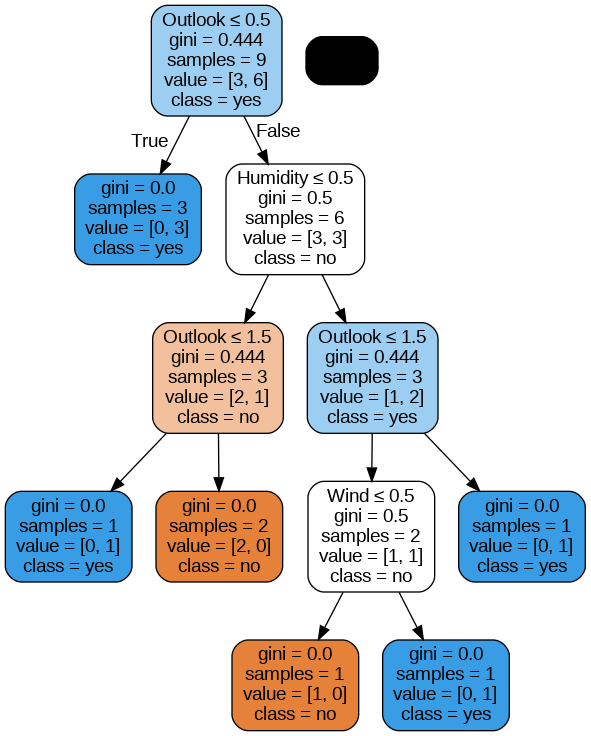

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

# 1. Create and Train the DecisionTreeClassifier
classifier = DecisionTreeClassifier()  # Create the classifier object
classifier.fit(X_train, y_train)  # Train the classifier using training data

# 2. Visualize the Decision Tree
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True,
                special_characters=True, feature_names=X.columns,
                class_names=['no', 'yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('playtennis.png')
Image(graph.create_png())